### Importación de librerías

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Carga del dataset
df = pd.read_csv(r"winequality-red.csv", sep=";")

In [210]:
#Verificación del dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [211]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
392,9.5,0.370,0.52,2.0,0.082,6.0,26.0,0.99800,3.18,0.51,9.5,5
469,8.7,0.820,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5
1537,5.4,0.580,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,6
1035,10.1,0.370,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7
393,8.4,0.665,0.61,2.0,0.112,13.0,95.0,0.99700,3.16,0.54,9.1,5


### Analisis exploratorio de los datos

In [212]:
#Separación del dataset
x = df.drop(["quality","pH","chlorides","residual sugar"], axis=1)
y = df["quality"]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8')])

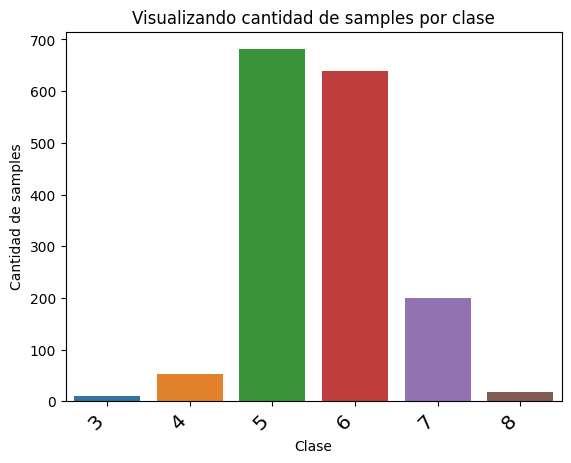

In [213]:
#Visualización de la cantidad de samples por clase
class_samples = []
for i in df['quality'].unique().tolist():
    class_samples.append(df[df['quality']==i].shape[0])
    
sns.barplot(x = df['quality'].unique().tolist(), y = class_samples)
plt.ylabel("Cantidad de samples")
plt.xlabel("Clase")
plt.title("Visualizando cantidad de samples por clase")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

Se puede observar que existe un desbalanceo entre las muestras del dataset por lo que entrenar al modelo con estos datos generará un modelo mal entrenado.

Se debe de aplicar alguna estrategia para compensar las clases que tienen pocas muestras, para este caso se aplicara un over sampling para generar más muestras sinteticas en las clases con pocos samples.

Cantidad de muestras: [681, 681, 681, 681, 681, 681]


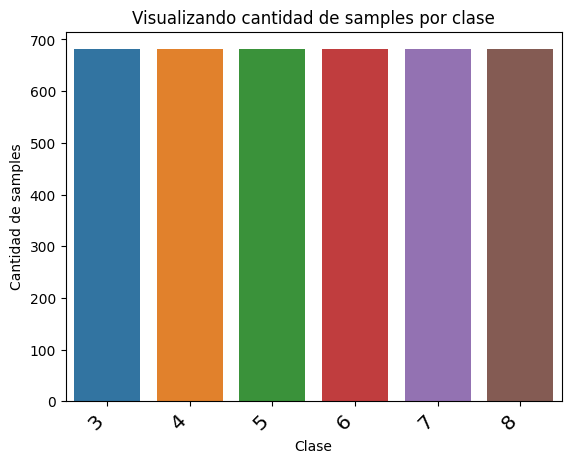

In [214]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 1)
x_res, y_res = ros.fit_resample(x, y)

#Visualización de la cantidad de samples por clase
class_samples = []
for i in y_res.unique().tolist():
    class_samples.append(y_res[y_res==i].shape[0])
    
sns.barplot(x = df['quality'].unique().tolist(), y = class_samples)
plt.ylabel("Cantidad de samples")
plt.xlabel("Clase")
plt.title("Visualizando cantidad de samples por clase")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

print(f"Cantidad de muestras: {class_samples}")

In [215]:
#Visualización de los tipos de datos del df
print("Tipos de datos:")
df.dtypes

Tipos de datos:


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<Axes: >

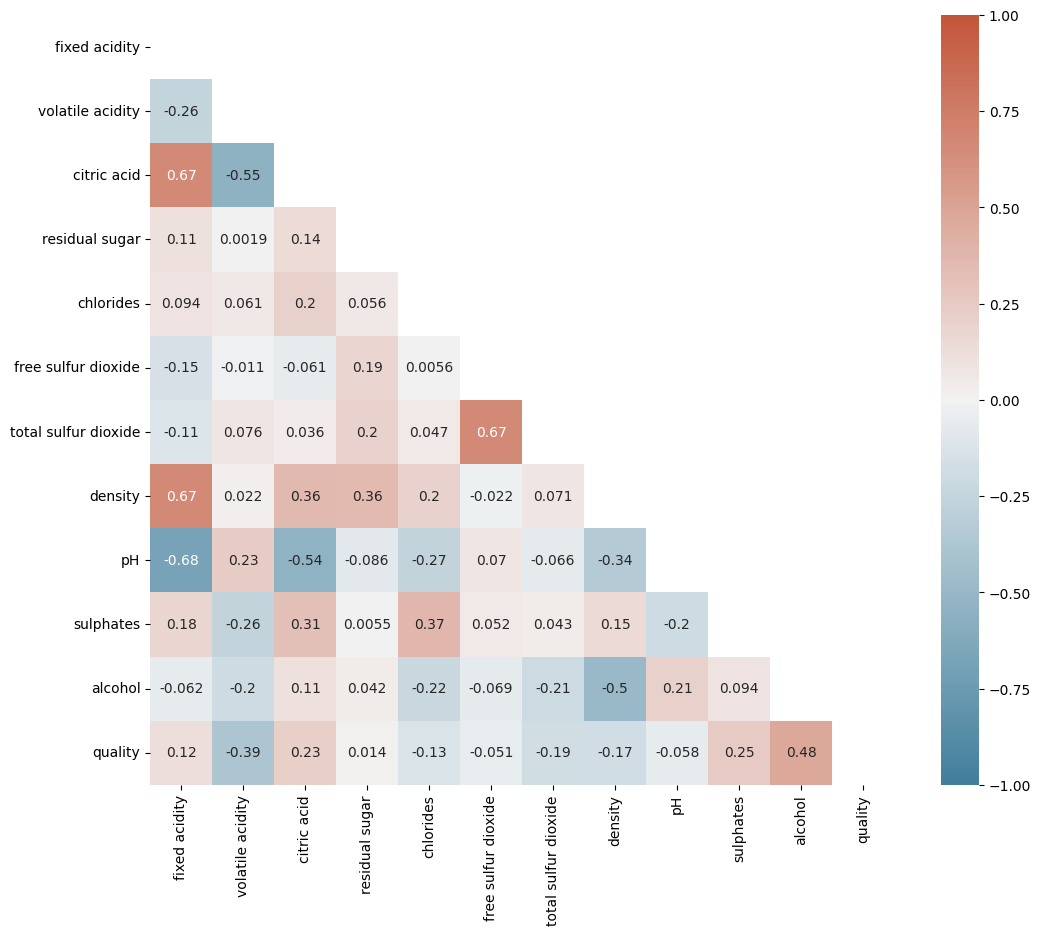

In [216]:
#Visualización de la correlación entre features
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmax=1,vmin=-1, mask=mask)

Se aprecia lo siguiente:
1. Existe una correlación de __0.67__ entre __fixed acidity__ y __density__.
2. Existe una correlación de __0.67__ entre __free sulfur dioxide__ y __total sulfur dioxide__.

Se puede realizar una reducción de dimensionalidad con estos features.

In [217]:
#Reducción de dimensionalidad fixed acidity y density
from sklearn.decomposition import PCA

#COnstrucción de arreglo con los features deseados
features_red_1 = []
for i in range(len(x_res["fixed acidity"])):
    features_red_1.append([x_res["fixed acidity"][i],x_res["density"][i]])
features_red_1 = np.array(features_red_1)

#Reducción de los features
pca = PCA(n_components=1)
pca.fit(features_red_1)
features_red_1_pca = pca.transform(features_red_1)

#Resultados
print(f"Tamaño del feature reducido: {features_red_1_pca.shape}")
print(f"Valor de la varianza de los componentes: {pca.explained_variance_ratio_}")

Tamaño del feature reducido: (4086, 1)
Valor de la varianza de los componentes: [0.99999929]


In [218]:
#Reducción de dimensionalidad free sulfure dioxide y total sulfur dioxide
from sklearn.decomposition import PCA

#COnstrucción de arreglo con los features deseados
features_red_2 = []
for i in range(len(x_res["fixed acidity"])):
    features_red_2.append([x_res["free sulfur dioxide"][i],x_res["total sulfur dioxide"][i]])
features_red_2 = np.array(features_red_2)

#Reducción de los features
pca = PCA(n_components=1)
pca.fit(features_red_2)
features_red_2_pca = pca.transform(features_red_2)

#Resultados
print(f"Tamaño del feature reducido: {features_red_2_pca.shape}")
print(f"Valor de la varianza de los componentes: {pca.explained_variance_ratio_}")

Tamaño del feature reducido: (4086, 1)
Valor de la varianza de los componentes: [0.94572877]


In [219]:
#Drop de los features inutilizados
x_res = x_res.drop(["fixed acidity","free sulfur dioxide","total sulfur dioxide","density"],axis=1)
x_res["pca1"] = features_red_1_pca
x_res["pca2"] = features_red_2_pca
x_res.head()

,volatile acidity,citric acid,sulphates,alcohol,pca1,pca2
0,0.70,0.00,0.56,9.4,-0.941531,-4.762233
1,0.88,0.00,0.68,9.8,-0.541532,30.644507
2,0.76,0.04,0.65,9.8,-0.541531,15.611357
3,0.28,0.56,0.58,9.8,2.858468,21.916981
4,0.70,0.00,0.56,9.4,-0.941531,-4.762233


In [220]:
#Normalización de los datos
from sklearn.preprocessing import StandardScaler
x_normalised = StandardScaler().fit_transform(x_res)

In [221]:
#Obtención del set de entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalised, y_res, test_size=0.3, random_state=00000)

### Generación del modelo y entrenamiento

In [252]:
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
rf = RandomForestClassifier(n_estimators=200, 
                            random_state=00000, 
                            max_depth=7, 
                            criterion="gini", 
                            max_features=3)

In [253]:
#Entrenamiento
rf.fit(x_train, y_train)

#Obtención de las predicciones
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

### Evalucación del modelo

In [254]:
from sklearn.metrics import classification_report

#Reporte con datos de entrenamiento
print("Reporte de clasificación de entrenamiento:")
print(classification_report(y_train, y_train_pred))

#Reporte con datos de testeo
print("Reporte de clasificación de testeo:")
print(classification_report(y_test, y_test_pred))

Reporte de clasificación de entrenamiento:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       494
           4       0.95      0.96      0.96       505
           5       0.75      0.81      0.78       455
           6       0.75      0.62      0.68       466
           7       0.84      0.88      0.86       475
           8       0.97      1.00      0.98       465

    accuracy                           0.88      2860
   macro avg       0.87      0.88      0.87      2860
weighted avg       0.88      0.88      0.88      2860

Reporte de clasificación de testeo:
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       187
           4       0.88      0.98      0.93       176
           5       0.69      0.65      0.67       226
           6       0.57      0.44      0.50       215
           7       0.73      0.78      0.76       206
           8       0.91      1.00      0.95       216

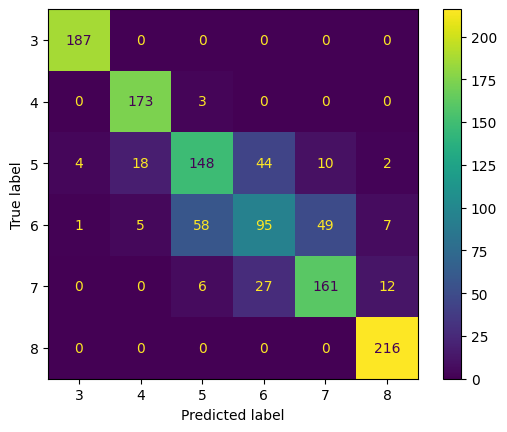

In [260]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels = rf.classes_)
display.plot()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'sulphates'),
  Text(3, 0, 'pca2'),
  Text(4, 0, 'pca1'),
  Text(5, 0, 'citric acid')])

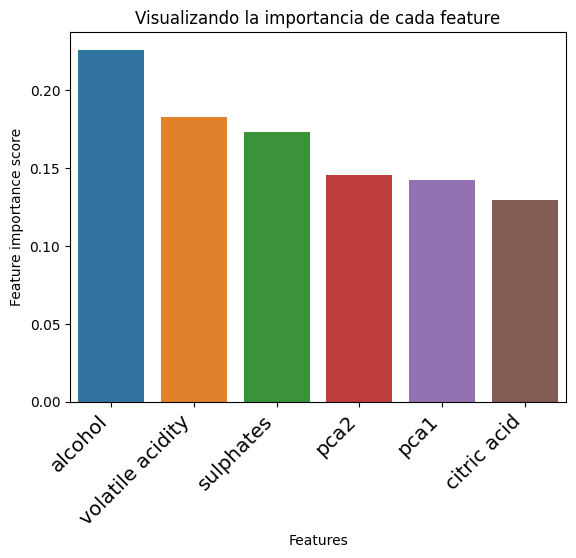

In [226]:
#Visualización de los features principales
feature_importances_df = pd.DataFrame(
    {"feature": list(x_res.columns),"importance": rf.feature_importances_}
    ).sort_values("importance", ascending=False)

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.ylabel("Feature importance score")
plt.xlabel("Features")
plt.title("Visualizando la importancia de cada feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

### Tuning de los hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV

#Creación del grid para la selección de hiperparametros
param_grid = {
    'max_depth':[i for i in range(3,7)],
    'max_features':['log2','sqrt'],
    'min_samples_leaf':[1,2,3],
    'n_estimators':[i for i in range(100,110)]
}

In [ ]:
#Busqueda de huperparámetros
rf_random = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
    )

#Muestra de los mejores hiperparámetros
rf_random.fit(x_train,y_train)
rf_random.best_params_
print(rf_random.best_params_)

#Creación de un grid con esos valores
best_grid = rf_random.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 106}


In [ ]:
#Obtención de las predicciones
best_y_train_pred = best_grid.predict(x_train)
best_y_test_pred = best_grid.predict(x_test)

#Reporte con datos de entrenamiento
print("Reporte de clasificación de entrenamiento:")
print(classification_report(y_train, best_y_train_pred))

#Reporte con datos de testeo
print("Reporte de clasificación de testeo:")
print(classification_report(y_test, best_y_test_pred))

Reporte de clasificación de entrenamiento:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.13      0.23        38
           5       0.78      0.84      0.81       473
           6       0.69      0.78      0.73       434
           7       0.85      0.60      0.70       154
           8       0.00      0.00      0.00        13

    accuracy                           0.75      1119
   macro avg       0.55      0.39      0.41      1119
weighted avg       0.75      0.75      0.73      1119

Reporte de clasificación de testeo:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.71      0.75      0.73       208
           6       0.62      0.67      0.64       204
           7       0.45      0.38      0.41        45
           8       0.00      0.00      0.00         5

c:\Users\kevin\Desktop\cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\Desktop\cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\Desktop\cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m